In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [229]:
dataset=pd.read_csv("D:\ML practice\daily-min-temperatures.csv")
print(dataset.head())
dataset.tail()

         Date  Temp
0  1981-01-01  20.7
1  1981-01-02  17.9
2  1981-01-03  18.8
3  1981-01-04  14.6
4  1981-01-05  15.8


,Date,Temp
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7
3649,1990-12-31,13.0


In [230]:
dataset.isnull().sum()   # no missing value present

Date    0
Temp    0
dtype: int64

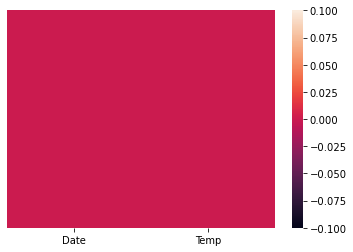

In [231]:
sns.heatmap(dataset.isnull(),yticklabels=False) 

In [232]:
df=dataset.set_index("Date")
print(df)

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[3650 rows x 1 columns]


In [233]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


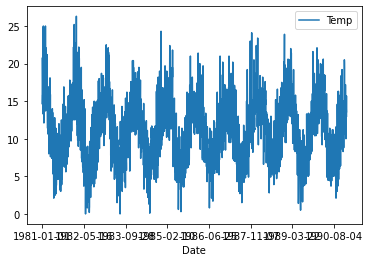

In [234]:
df.plot()

In [235]:
#checking for the dataset to be stationary

In [236]:
from statsmodels.tsa.stattools import adfuller

def ad_test(data):
    dftest=adfuller(data)
    print("ADF  ",dftest[0])
    print(" P-value  ",dftest[1])
    print(" Lags used  ",dftest[2])
    print("total observations count ",dftest[3])
    



In [237]:
ad_test(df["Temp"])
#testing of hypothesis whether is a null hypothesis or not


ADF   -4.444804924611701
 P-value   0.00024708263003609754
 Lags used   20
total observations count  3629


In [238]:
#hypothesis checking 

def Hypo(df):
    if(adfuller(df)[1]>0.00001):
        print("The data is non-stationary")
    else:
        print("The data is statioanty")
        
Hypo(df)

The data is non-stationary


# although its not required to reduce the futher P value still doing it to make it more and more precise




In [239]:
shifted_temp=df["Temp"].shift(1)
print(shifted_temp)

Date
1981-01-01     NaN
1981-01-02    20.7
1981-01-03    17.9
1981-01-04    18.8
1981-01-05    14.6
              ... 
1990-12-27    14.6
1990-12-28    14.0
1990-12-29    13.6
1990-12-30    13.5
1990-12-31    15.7
Name: Temp, Length: 3650, dtype: float64


In [240]:
new_dataset=df["Temp"]-shifted_temp
new_dataset

Date
1981-01-01    NaN
1981-01-02   -2.8
1981-01-03    0.9
1981-01-04   -4.2
1981-01-05    1.2
             ... 
1990-12-27   -0.6
1990-12-28   -0.4
1990-12-29   -0.1
1990-12-30    2.2
1990-12-31   -2.7
Name: Temp, Length: 3650, dtype: float64

In [241]:
df=new_dataset.dropna()
print(df)
df.isnull().sum()

Date
1981-01-02   -2.8
1981-01-03    0.9
1981-01-04   -4.2
1981-01-05    1.2
1981-01-06    0.0
             ... 
1990-12-27   -0.6
1990-12-28   -0.4
1990-12-29   -0.1
1990-12-30    2.2
1990-12-31   -2.7
Name: Temp, Length: 3649, dtype: float64


0

In [242]:
ad_test(df)    #non return type

ADF   -18.028224167991972
 P-value   2.681561822675255e-30
 Lags used   24
total observations count  3624


In [243]:
Hypo(df)     #the data gone stationary

The data is statioanty


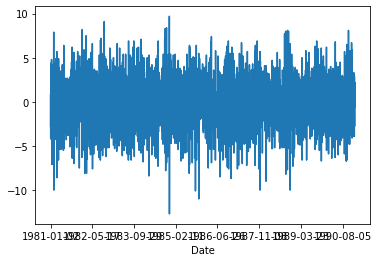

In [244]:
df.plot()    #now looks good

# ARMIA

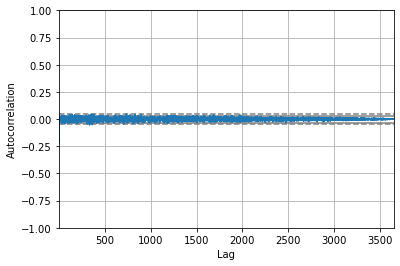

In [245]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df)


In [246]:
from statsmodels.tsa.arima_model import ARIMA

In [247]:
from pmdarima import auto_arima
auto_arima(df)   #lloking fo the minimum AIC score for the used p,d,q

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [248]:
auto_arima(df).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3649
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -8386.393
Date:                Wed, 30 Dec 2020   AIC                          16780.785
Time:                        01:26:16   BIC                          16805.594
Sample:                             0   HQIC                         16789.621
                               - 3649                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4963      0.017     28.559      0.000       0.462       0.530
ar.L2         -0.1295      0.018     -7.394      0.000      -0.164      -0.095
ma.L1         -0.9008      0.010    -92.103      0.000      -0.920      -0.882
sigma2         5.8029      0.128     45.189      0.000       5.551       6.055
===================================================================================
Ljung-Box (Q):                       46.42   Jarque-Bera (JB):                14.31
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [249]:
from sklearn.model_selection import train_test_split

training_data=df.iloc[:-900]
test_data=df.iloc[-900:]

In [250]:
print(training_data)
print(test_data)

Date
1981-01-02   -2.8
1981-01-03    0.9
1981-01-04   -4.2
1981-01-05    1.2
1981-01-06    0.0
             ... 
1988-07-09   -4.6
1988-07-10    0.8
1988-07-11    4.8
1988-07-12   -5.3
1988-07-13    0.4
Name: Temp, Length: 2749, dtype: float64
Date
1988-07-14    2.5
1988-07-15   -4.7
1988-07-16    1.0
1988-07-17    1.7
1988-07-18    0.3
             ... 
1990-12-27   -0.6
1990-12-28   -0.4
1990-12-29   -0.1
1990-12-30    2.2
1990-12-31   -2.7
Name: Temp, Length: 900, dtype: float64


In [251]:
from statsmodels.tsa.arima_model import ARIMA
#we get the order as (2,0,1)

In [252]:
model=ARIMA(training_data,order=(2,0,1))
fitted_model=model.fit()


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [253]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 2749
Model:                     ARMA(2, 1)   Log Likelihood               -6350.724
Method:                       css-mle   S.D. of innovations              2.438
Date:                Wed, 30 Dec 2020   AIC                          12711.448
Time:                        01:26:17   BIC                          12741.043
Sample:                             0   HQIC                         12722.141
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0035      0.007     -0.484      0.629      -0.018       0.011
ar.L1.Temp     0.5036      0.021     24.043      0.000       0.463       0.545
ar.L2.Temp    -0.1279      0.020     -6.353      0.000      -0.167      -0.088
ma.L1.Temp    -0.9026      0.010    -90.648      0.000      -0.922      -0.883
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9693           -1.9857j            2.7967           -0.1257
AR.2            1.9693           +1.9857j            2.7967            0.1257
MA.1            1.1079           +0.0000j            1.1079            0.0000
-----------------------------------------------------------------------------
"""

In [254]:
#doing prediction
start=len(training_data)
end=len(training_data)+len(test_data)-1
print(start,end)

2749 3648


In [255]:
prediction=fitted_model.predict(start=start,end=end)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [256]:
prediction.index=df.index[start:end+1]
print(prediction)

Date
1988-07-14    0.633788
1988-07-15    0.265820
1988-07-16    0.050630
1988-07-17   -0.010688
1988-07-18   -0.014053
                ...   
1990-12-27   -0.003521
1990-12-28   -0.003521
1990-12-29   -0.003521
1990-12-30   -0.003521
1990-12-31   -0.003521
Length: 900, dtype: float64


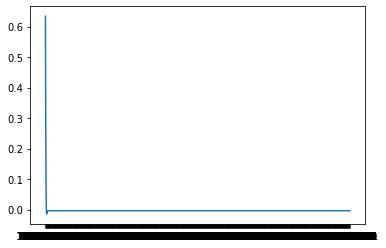

In [259]:
plt.plot(prediction)

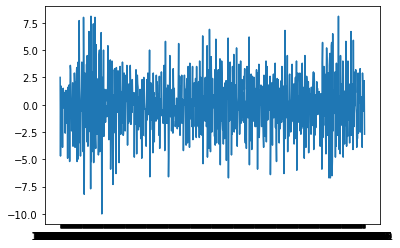

In [258]:
plt.plot(test_data)